<a href="https://colab.research.google.com/github/AlexanderVinarsky/Muography_Research/blob/main/Muography_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [526]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [527]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

from google.colab import files

In [ ]:
df = np.load('drive/MyDrive/Muons/responses_norm.npy')
df = pd.DataFrame(df[-2])
df.style.background_gradient(cmap='plasma', axis=None)

In [529]:
from scipy.ndimage.measurements import label, find_objects

threshold = 0.40

labels, num_labels = label(df > threshold)

regions = find_objects(labels)

len(regions)

<ipython-input-529-33e79a4ce8e8>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label, find_objects
<ipython-input-529-33e79a4ce8e8>:1: DeprecationWarning: Please use `find_objects` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label, find_objects


38

In [530]:
import re
coordinates_raw = []

for i in range(num_labels):
  temp=[]
  x_slice = re.findall(r'\d+', str(regions[i][1]))
  temp.append(int(x_slice[0]))
  temp.append(int(x_slice[1]))
  y_slice = re.findall(r'\d+', str(regions[i][0]))
  temp.append(int(y_slice[0]))
  temp.append(int(y_slice[1]))
  coordinates_raw.append(temp)

In [531]:
coordinates = [i for i in coordinates_raw if (i[1] - i[0] > 3 and i[3]-i[2]>3)]

In [532]:
shapes=[]
for i in range(len(coordinates)):
  shapes.append(df.iloc[coordinates[i][2]:coordinates[i][3], coordinates[i][0]:coordinates[i][1]])

In [533]:
for i in range(len(coordinates)):
  coordinates[i] = [coordinates[i][0], coordinates[i][1]-1, coordinates[i][2], coordinates[i][3]-1]

In [534]:
for i in range(len(coordinates)):
  print(i)
  print(coordinates[i])

0
[59, 80, 0, 4]
1
[219, 247, 0, 23]
2
[262, 281, 0, 3]
3
[31, 37, 3, 8]
4
[256, 269, 3, 7]
5
[122, 126, 5, 9]
6
[185, 194, 6, 13]
7
[205, 223, 7, 22]
8
[146, 166, 8, 12]
9
[31, 41, 14, 18]
10
[111, 130, 14, 20]
11
[270, 284, 15, 21]
12
[85, 109, 23, 32]
13
[202, 210, 27, 32]
14
[222, 245, 32, 44]
15
[7, 11, 36, 39]


In [535]:
shapes[8].style.background_gradient(cmap='plasma', axis=None)

,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
8,0.411142,0.457429,0.502991,0.520724,0.534050,0.527812,0.513547,0.496670,0.469582,0.443714,0.431047,0.418454,0.406342,0.395487,0.380834,0.359110,0.331150,0.298394,0.262164,0.236107,0.197683
9,0.216134,0.267027,0.317831,0.367720,0.432163,0.474245,0.489018,0.504669,0.511830,0.521608,0.534705,0.549952,0.566755,0.569911,0.564630,0.547956,0.521308,0.484051,0.438201,0.398411,0.330995
10,0.043177,0.088479,0.135199,0.182738,0.260897,0.345137,0.420557,0.484108,0.547433,0.611088,0.673933,0.682908,0.681549,0.677298,0.669534,0.645873,0.605578,0.544141,0.487169,0.447158,0.361459
11,0.043177,0.074562,0.119160,0.164435,0.240737,0.323329,0.397180,0.459253,0.535281,0.550075,0.556439,0.561508,0.564967,0.565851,0.563373,0.557193,0.548065,0.538754,0.543806,0.541833,0.436258
12,0.123553,0.174121,0.237655,0.289211,0.351763,0.360380,0.368916,0.377925,0.387293,0.396767,0.405869,0.413950,0.420572,0.424666,0.425359,0.422245,0.416024,0.409418,0.416940,0.427264,0.445345


In [536]:
answers=[]
for i in range(len(coordinates)):
  answers.append(False)

In [537]:
answers[0] = False
answers[1] = True
answers[2] = False
answers[3] = False
answers[5] = False
answers[6] = False
answers[7] = False
answers[8] = False
answers[9] = True
answers[10] = True
answers[11] = False
answers[12] = True
answers[13] = False
answers[14] = True
answers[15] = False

In [538]:
for i in range(len(shapes)):
  print(shapes[i].shape)

(5, 22)
(24, 29)
(4, 20)
(6, 7)
(5, 14)
(5, 5)
(8, 10)
(16, 19)
(5, 21)
(5, 11)
(7, 20)
(7, 15)
(10, 25)
(6, 9)
(13, 24)
(4, 5)


In [539]:
shapes[0]

,59,60,61,62,63,64,65,66,67,68,...,71,72,73,74,75,76,77,78,79,80
0,0.441324,0.503908,0.555913,0.608445,0.660787,0.712693,0.763353,0.775881,0.797004,0.803994,...,0.772275,0.696182,0.642928,0.636847,0.658843,0.688556,0.624688,0.549071,0.465936,0.387277
1,0.375107,0.437723,0.504331,0.583643,0.663531,0.732181,0.776766,0.805343,0.841171,0.859946,...,0.704458,0.647349,0.612025,0.622340,0.658843,0.697009,0.649991,0.583196,0.521203,0.452800
2,0.296471,0.371836,0.456752,0.562310,0.662317,0.755148,0.819035,0.829837,0.828784,0.828094,...,0.736200,0.695591,0.671272,0.674104,0.674016,0.695540,0.700097,0.612172,0.526530,0.444050
3,0.311373,0.358436,0.428125,0.533026,0.590099,0.607214,0.618464,0.622721,0.619081,0.620103,...,0.558009,0.533806,0.527151,0.541920,0.548445,0.572664,0.588038,0.495389,0.429877,0.366608
4,0.214742,0.244956,0.299408,0.370397,0.386518,0.399878,0.409683,0.415141,0.415564,0.423578,...,0.398047,0.386575,0.388160,0.403910,0.405971,0.422875,0.433420,0.424080,0.406532,0.358746


In [540]:
#pd.Series 
#for i in range(len(shapes)):
#  new_cols = []
#  new_cols.append(str(len(shapes[i].columns[-1:])))
#  for j in range(32-len(shapes[i].columns)):
#    new_cols.append(str(j+1))

#  new_data = {col: [0]*len(shapes[i]) for col in new_cols}

#  shapes[i] = shapes[i].assign(**new_data)
#  for j in range(32-len(shapes[i])):
#    shapes[i]= shapes[i].append(pd.Series(0, index=shapes[i].columns), ignore_index=True)

# Нейросеть

In [541]:
!pip install keras
!pip install tensorflow

In [542]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [543]:
datagen=ImageDataGenerator(rescale=1./255)

In [544]:
#training_set = train_datagen.

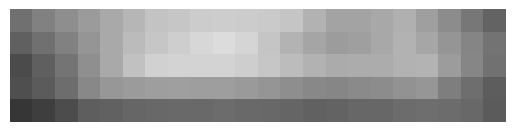

In [571]:
picture = plt.figure(frameon = False)
plt.imshow(shapes[0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
picture.show()
picture.savefig('samplefigure.png')
#files.download('samplefigure.png')

In [546]:
classifier = Sequential()
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, kernel_size=(3,3), strides=(1,1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(256,activation='relu'))
#classifier.add(Dense(OutputNeurons, activation='softmax'))
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

NameError: ignored